----
 ####        ___Лабораторная работа №1___
#### ___📄 Градиентный спуск и его модификации___  #

----

> ___Лабораторная работа №1___           по курсу Фундаментальные концепции ИИ (ML)       
>🎓  Прозоров Евгений Иванович 109М    
>📧 eugene_ivanson@mail.ru       
>tg: @Eug_Iva           

___Описание задачи:___
Источник:  https://github.com/resi2311/AI-fundamentals#лабораторные-работы     
Градиентный спуск и его модификации           
Выбрать тестовые функции оптимизации (2 шт)    - ф-я Растригина и ф-я Матьяса       
Запрограммировать собственную реализацию классического градиентного спуска         
Запрограммировать пайлайн тестирования алгоритма оптимизации         
Визуализации функции и точки оптимума         
Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков         
Визуализации точки найденного решения (можно добавить анимацию на плюс балл)         
Запрограммировать метод вычисления градиента         
Передача функции градиента от пользователя         
Символьное вычисление градиента (например с помощью sympy) (на доп балл)         
Численная аппроксимация градиента (на доп балл)         
Запрограммировать одну моментную модификацию и протестировать ее         
Запрограммировать одну адаптивную модификацию и протестировать ее         
Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их         



In [2]:
from sklearn import datasets
from typing import Tuple, Mapping

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.animation as animation
import numpy as np
import math

from IPython.display import HTML

#Функция №1 - Функция Матьяса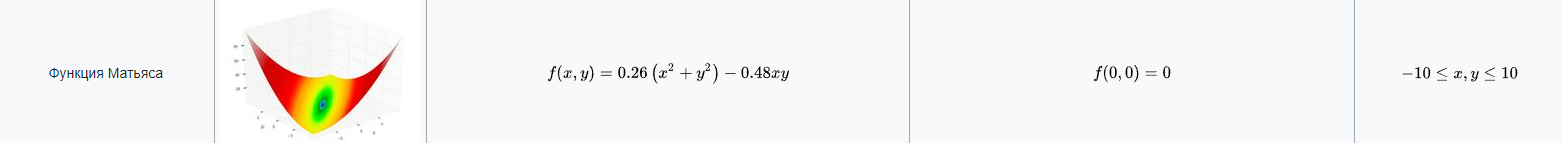

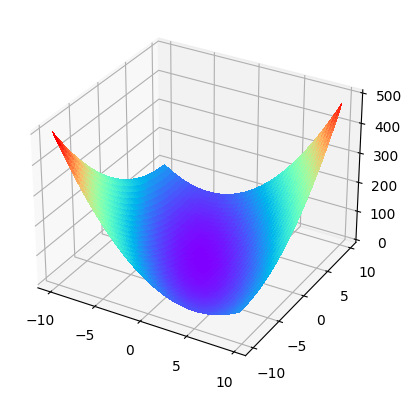

In [3]:
def func_matias(x: np.ndarray) -> np.float64:
    return x[0] * x[0] + (x[0] + x[1]) ** 2
    #return 0.26 * (x[0] + x[1]) ** 2 - 0.48 * x[0] * x[1]


def grad_matias(x: np.ndarray) -> np.ndarray:
    return np.array([2 * x[0] + 2 * (x[0] + x[1]), 2 * (x[0] + x[1])])
    #return np.array([0.26 * (x[0] + x[1]) ** 2 - 0.48 * x[0] * x[1]])


X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)

#X = np.linspace(-5.12, 5.12, 100)
#Y = np.linspace(-5.12, 5.12, 100)


X, Y = np.meshgrid(X, Y)
Z = func_matias(np.array([X, Y]))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')



# Функция №2 - Функция Растригина       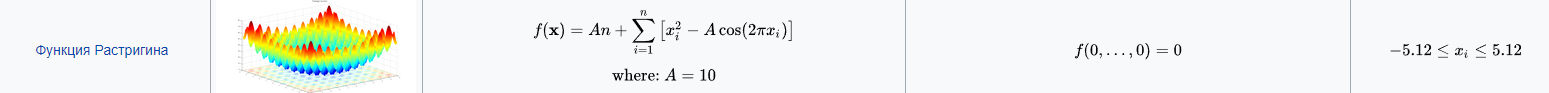

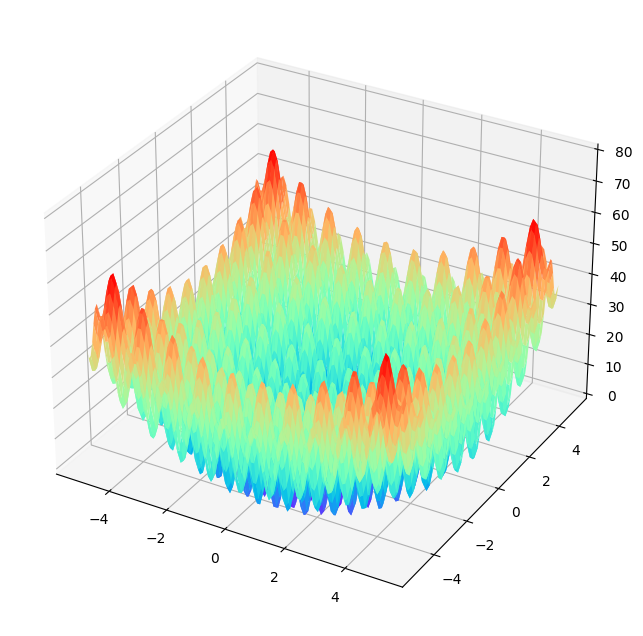

In [4]:
def rastrigin_func(x: np.ndarray) -> np.float64:
    return -x[0] * np.sin(4 * np.pi * x[0]) -x[1] * np.sin(4 * np.pi * x[1])

def grad_three_humped_func(x: np.ndarray) -> np.ndarray:
    return np.array([np.sin(4 * np.pi * x[0]) + x[0] * 4 * np.pi * np.cos(4 * np.pi * x[0]), np.sin(4 * np.pi * x[1]) + x[1] * 4 * np.pi * np.cos(4 * np.pi * x[1])])


# Задание точек на оси X и Y Переменные X Y определяют значения точек на оси X и Y. Массивы X Y -5.12 +5.12 и точек 100
X = np.linspace(-5.12, 5.12, 100)
Y = np.linspace(-5.12, 5.12, 100)

# матрица координатной сетки на основе массивов XY. Результатом являются две матрицы: координаты X,другая Y
X, Y = np.meshgrid(X, Y)

#Значения функции Z вычисляются для каждой точки на координатной сетке
Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y))


#фигура 12 на 8, трехмерная ось ax. поверхность `ax.plot_surface` ,
#`rstride``cstride` плотность графика, `cmap` цветовая карта ,
# `linewidth`толщина линий, и `antialiased` - сглаживание .
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap=cm.rainbow, linewidth=0.08,
                antialiased=True)

#лимиты для значений по оси Z. график в диапазоне от 0 до 80.
ax.set_zlim(0, 80)
# plt.savefig('rastrigin_graph.png')
plt.show()


# Выполнение градиентного спуска для №1

In [5]:
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000) -> tuple[np.ndarray, np.float32, np.ndarray]:
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations
    Returns the minimum point, the value at that point, and the search history
    '''

    x_old = x0.copy()
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        x_new = x_old - lr * df(x_old)
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)
    %matplotlib notebook

In [6]:
def plot_GD(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000, GD_type: Mapping = my_GD, video_name = "GD", plot_range: list = [-10, 10], z_lim: list = None):
    x1, z1, history = GD_type(f, df, x0, lr, max_iter)
    '''
 `f`: a mapping representing the function to optimize
 `df`: a mapping representing the derivative of the function
 `x0`: the initial point for optimization
 `lr`: the learning rate for gradient descent (default value is 0.001)
 `max_iter`: the maximum number of iterations for gradient descent (default value is 10000)
 `GD_type`: the type of gradient descent to perform (default value is `my_GD`)
 `video_name`: the name of the video file to save the visualization (default value is "GD")
 `plot_range`: the range of values to plot for x and y axes (default value is [-10, 10])
 `z_lim`: the limits for the z axis of the plot (default value is None)
    '''

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Plot the surface.
    X = np.arange(plot_range[0], plot_range[1], 0.01)
    Y = np.arange(plot_range[0], plot_range[1], 0.01)
    X, Y = np.meshgrid(X, Y)
    Z = f(np.array([X, Y]))
    surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow, linewidth=0, antialiased=False, alpha=0.25)

    # Customize the z axis.
    #ax.set_zlim(-1.01, 1.01)
    if z_lim != None:
        ax.set_zlim(z_lim[0], z_lim[1])
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    #xx = ax.scatter(x0[0], x0[1], func_matias(x0), c = 'black')

    line, = ax.plot([], [], [], 'r-', label = 'Gradient descent', lw = 1.5)
    point, = ax.plot([], [], [], '*', color = 'black')

    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([x0[0]], [x0[1]])
    point.set_3d_properties([func_matias(x0)])

    def update_point(i):
        i = i + 1
        if (i == len(history)):
            return line, point
        #print(history[:2,0])
        #xx.set_data(history[i][0], history[i][1], history[i][2], c = 'black')
        # Animate line
        line.set_data(history[:i, 0], history[:i, 1])
        line.set_3d_properties(history[:i, 2])

        # Animate points
        point.set_data([history[i][0]], [history[i][1]])
        point.set_3d_properties([history[i][2]])
        return line, point

    ani = animation.FuncAnimation(fig, update_point, frames=range(len(history)),interval = 50, blit=True)

    writervideo = animation.FFMpegWriter(fps=10)
    ani.save(f'../media/{video_name}.mp4', writer=writervideo)
    return x1[0], x1[1], z1


In [7]:
def check_answer_matias(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''

    x_answer = np.array([0, 0])
    f_answer = 0
    print("Distance to the answer point", math.sqrt((x[0] - x_answer[0]) ** 2 + (x[1] - x_answer[1]) ** 2))
    print("Function value differece", f_val - f_answer)

In [8]:
x, f_val, history = my_GD(func_matias, grad_matias, np.array([10, 10]), max_iter = 5000)
check_answer_matias(x, f_val)

Distance to the answer point 0.07116800290254796
Function value differece 0.0019346137822891848


(-0.3174961922474784, 2.4103837799160726, 4.480982286708914)

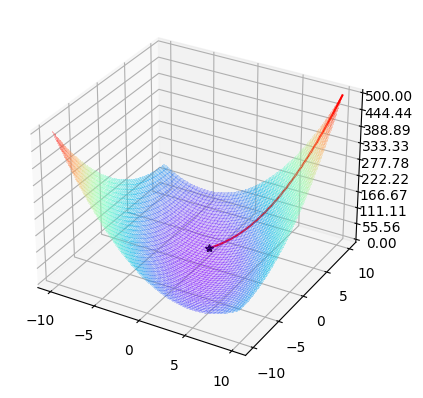

In [9]:
plot_GD(func_matias, grad_matias, np.array([10, 10]), max_iter = 500)

# Выполнение градиентного спуска для №2

In [10]:
def check_answer_rastrigin(x: np.ndarray, f_val: np.float32):
    '''
    x - the found minimum point
    f_val - value at found minimum point
    '''

    x_answer = np.array([0, 0])
    f_answer = 0
    print("Distance to the answer point", (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y)) )
    print("Function value differece", f_val - f_answer)

In [11]:
x, f_val, history = my_GD(rastrigin_func, grad_three_humped_func, np.array([0, 1]), max_iter = 1000)

In [12]:
check_answer_rastrigin(x, f_val)

Distance to the answer point [[37.84942745 34.14476436 34.51651279 ... 34.51651279 34.14476436
  37.84942745]
 [34.14476436 30.44010126 30.81184969 ... 30.81184969 30.44010126
  34.14476436]
 [34.51651279 30.81184969 31.18359812 ... 31.18359812 30.81184969
  34.51651279]
 ...
 [34.51651279 30.81184969 31.18359812 ... 31.18359812 30.81184969
  34.51651279]
 [34.14476436 30.44010126 30.81184969 ... 30.81184969 30.44010126
  34.14476436]
 [37.84942745 34.14476436 34.51651279 ... 34.51651279 34.14476436
  37.84942745]]
Function value differece 0.8785916279847861


(0.0, 0.8821591171145272, 0.8785916279847861)

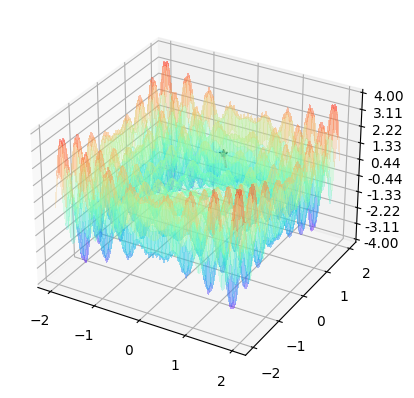

In [13]:
plot_GD(rastrigin_func, grad_three_humped_func, np.array([0, 1]), max_iter = 500, video_name = "GD_on_multi", plot_range = [-2, 2], z_lim = [-4, 4])


Выглядит, будто метод не справился с функцией Растригина. Это неудивительно, нахождение минимума этой функции является достаточно трудной задачей из-за большой области поиска и большого количества локальных минимумов.

# Выполнение Adam для №2

Исследование ( представленное здесь https://habr.com/ru/companies/prequel/articles/568496/ ) показало, что Adam, AdaBelief, AdaBound, Adahessian показали себя как наилучшие методы оптимизации для функции Растригина, приблизившись к его глобальному минимуму.

Я попытался воссоздать метод AdaBelief, но столкнулся с трудностями и остановился на методе Adam.

In [14]:
#Adam  можно рассматривать как слияние основанного на импульсе стохастического
#градиентного спуска и RMSProp. Он масштабирует скорость обучения, используя
#квадраты градиентов, аналогично RMSProp, и усиливает импульс, используя
#скользящее среднее градиента, а не сам градиент, аналогично SGD с momentum.

In [15]:
def Adam(f: Mapping, df: Mapping, x0: np.ndarray, lr: float = 0.001, max_iter: int = 10000, beta1: float = 0.9, beta2: float = 0.999, eps: float = 10e-8) -> tuple[np.ndarray, np.float32, np.ndarray]:
    '''
  Данная функция реализует алгоритм оптимизации Adam для минимизации функции `f`
 с использованием её градиента `df`, начиная с начального значения `x0`.
  Параметры `lr`, `max_iter`, `beta1`, `beta2` и `eps` являются необязательными
 и имеют значения по умолчанию.
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    lr - gradient descent step
    max_iter - maximum number of iterations
    beta1 - moment 1 coefficient
    beta2 - moment 2 coefficient
    eps - adding to the denominator to avoid division by zero
    '''
    if (beta1 > 1 or beta1 < 0):
        print('incorrect beta1. Set default beta1 = 0.9')
        beta1 = 0.9

    if (beta2 > 1 or beta2 < 0):
        print('incorrect beta2. Set default beta1 = 0.999')
        beta2 = 0.999
    #Инициализируются переменные `x_old` как копия начального значения
    #`x0`, `u`, `m` и `v` равными нулю.
    x_old = x0.copy()
    u = 0
    m = 0
    v = 0

    #Создается список `history`, в который записывается первый элемент
    # `[x_old[0], x_old[1], f(x_old)]`, хранящий значения `x_old`, `x_old[0]`,
    #`x_old[1]` и значение функции `f` от `x_old`.
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        m = beta1 * m + (1 - beta1) * df(x_old)
        v = beta2 * v + (1 - beta2) * df(x_old)
        u = lr * m / (np.sqrt(v) + eps)
        x_new = x_old - u
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))
       #В список history добавляется элемент [x_new[0], x_new[1], f(x_new)],
       #содержащий значения x_new,x_new[0],x_new[1]и значение функции f от x_new


    return x_new, f(x_new), np.array(history)
    #Функция возвращает последнее значение x_new, значение функции f от x_new и
    #список history, содержащий значения x, x[0], x[1] и значения функции f от x
    #на каждой итерации.


In [16]:
x, f_val, history = Adam(rastrigin_func, grad_three_humped_func, np.array([0, 1]), max_iter = 1000)

In [17]:
check_answer_rastrigin(x, f_val)

Distance to the answer point [[37.84942745 34.14476436 34.51651279 ... 34.51651279 34.14476436
  37.84942745]
 [34.14476436 30.44010126 30.81184969 ... 30.81184969 30.44010126
  34.14476436]
 [34.51651279 30.81184969 31.18359812 ... 31.18359812 30.81184969
  34.51651279]
 ...
 [34.51651279 30.81184969 31.18359812 ... 31.18359812 30.81184969
  34.51651279]
 [34.14476436 30.44010126 30.81184969 ... 30.81184969 30.44010126
  34.14476436]
 [37.84942745 34.14476436 34.51651279 ... 34.51651279 34.14476436
  37.84942745]]
Function value differece 0.8785916279847861


In [18]:
def lr_scheduler(f: Mapping, df: Mapping, x0: np.ndarray, type: str, lr: float = 0.01, max_iter: int = 10000) -> tuple[np.ndarray, np.float32, np.ndarray]:
    '''
    f - optimized function
    df - derivative of the optimized function
    x0 - starting point
    type - can be linear or exponential
    lr - gradient descent step
    max_iter - maximum number of iterations
    '''

    if type not in ('linear', 'exponential'):
        print("incorrect type")
        return

    x_old = x0.copy()
    history = [np.array([x_old[0], x_old[1], f(x_old)])]
    for i in range(max_iter):
        if type == "linear":
            lr = lr * (1 - float(i) / max_iter)
        else:
            lr = lr * math.exp(-float(i) / max_iter)
        x_new = x_old - lr * df(x_old)
        x_old = x_new
        history.append(np.array([x_new[0], x_new[1], f(x_new)]))

    return x_new, f(x_new), np.array(history)

In [19]:
x, f_val, history = lr_scheduler(rastrigin_func, grad_three_humped_func, np.array([0, 1]), type = "linear", max_iter = 5000)
check_answer_rastrigin(x, f_val)

Distance to the answer point [[37.84942745 34.14476436 34.51651279 ... 34.51651279 34.14476436
  37.84942745]
 [34.14476436 30.44010126 30.81184969 ... 30.81184969 30.44010126
  34.14476436]
 [34.51651279 30.81184969 31.18359812 ... 31.18359812 30.81184969
  34.51651279]
 ...
 [34.51651279 30.81184969 31.18359812 ... 31.18359812 30.81184969
  34.51651279]
 [34.14476436 30.44010126 30.81184969 ... 30.81184969 30.44010126
  34.14476436]
 [37.84942745 34.14476436 34.51651279 ... 34.51651279 34.14476436
  37.84942745]]
Function value differece 0.8785916279847861


(9.875641217798405, 9.875641217798405, 19.75064123514583)

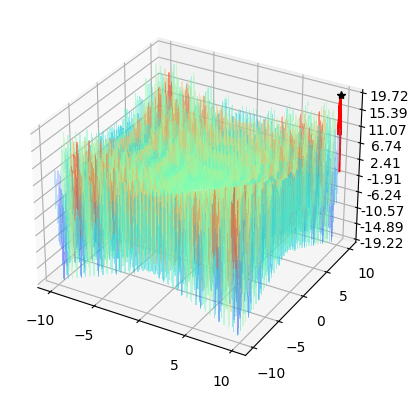

In [20]:
plot_GD(rastrigin_func, grad_three_humped_func, np.array([10, 10]), max_iter = 500, GD_type = Adam, video_name = "Adam")

500 операций затратили 5 мин рендера.

5000 операций затратили 50 мин 41 сек, выдаётся следующий результат:

(9.876016533743629, 9.876016533743629, 19.750421534388447)

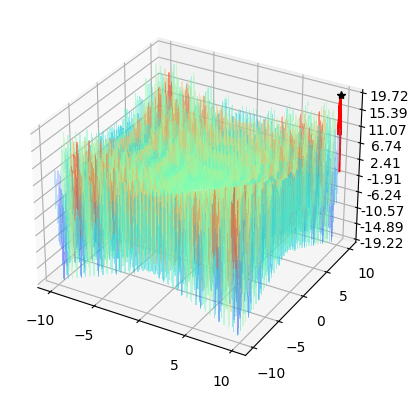

In [21]:
plot_GD(rastrigin_func, grad_three_humped_func, np.array([10, 10]), max_iter = 5000, GD_type = Adam, video_name = "Adam")